<a href="https://colab.research.google.com/github/Rodemarck/data/blob/master/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações iniciais

### importando libs

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
 
from math import floor
from math import ceil
 
import numpy as np
import pandas as pd
 
from datetime import datetime  
from datetime import timedelta 
 
#from scipy.spatial import distance
#from google.colab.patches import cv2_imshow as show

### importando  dados

In [ ]:
!git clone https://github.com/Rodemarck/data dados

fatal: destination path 'dados' already exists and is not an empty directory.


# Pre-processamento de dados

## pre-processamento de formatação

### nomeando as colunas e carregando arquivo

In [ ]:
def ler(arq):
    colunas =[
      'solicitacao',
      'localizacao',
      'data_abertura',
      'hora_abertura',
      'data_falha',
      'hora_falha',
      'descricao',
      'data_encerramento',
      'hora_encerramento'
    ]
    return pd.read_csv(arq ,names=colunas)

### dropando colunas inuteis

### formatando datas

In [ ]:
 
def dropa_colunas(dados):
    size = dados.shape[0]
    dados = dados.drop(range(0,4)) # remove as primeiras colunas
    dados = dados.drop(range(82,size,79)) # remove as rows de meta-dados que aparecem a a cada 79 colunas
        
    return (dados,size)

alguma data/horarios estão ausentes e por isso temos usa a flag  `errors='coerce'`

In [ ]:

def formata (dados):
    dados.data_abertura = pd.to_datetime(dados.data_abertura, errors='coerce')
    dados.data_falha = pd.to_datetime(dados.data_falha, errors='coerce')
    dados.data_encerramento = pd.to_datetime(dados.data_encerramento, errors='coerce')
		 
    dados.hora_abertura = pd.to_datetime(dados.hora_abertura,format= '%H:%M', errors='coerce').dt.time
    dados.hora_falha = pd.to_datetime(dados.hora_falha,format= '%H:%M', errors='coerce').dt.time
    dados.hora_encerramento = pd.to_datetime(dados.hora_encerramento,format= '%H:%M', errors='coerce').dt.time
		
    """### formatando quebra de linhas"""
    dados = dados.replace({'descricao':r'\r\n'},{'descricao':r'\n'}, regex=True)
		
    return dados

# processamento de dados

## enumerando falhas diaria

In [ ]:
 
def enumera_erros(dados):
    dados_ordenados_abertura = dados.sort_values(by='data_abertura').data_abertura
    size = dados_ordenados_abertura.shape[0]
    init = dados_ordenados_abertura[4]
    end = dados_ordenados_abertura[size]
         
    datas = pd.date_range(init, end)
         
    __NUMEROS_FALHAS_POR_DIA = []
         
    for dia in datas :
        __NUMEROS_FALHAS_POR_DIA.append(dados[dados.data_falha == dia].shape[0])
 
    size_falhas = len(__NUMEROS_FALHAS_POR_DIA)
        
    return (__NUMEROS_FALHAS_POR_DIA, datas, size_falhas)

### plotando grafico de falhas

In [ ]:
#falhas.plot(figsize=(18.5, 10.5), linewidth=0.2)

## Calculando tendencia

### Média movel

In [ ]:
 
 
def sequencia(n):
    list = []
    for i in range(n):
        list.append(np.nan)
    return list
 
 
def media_movel(n,lista,size):
    k = floor(n / 2)
    media = sequencia(k)
    if n % 2 == 1:
        for i in range(k, (size-k)):
            val = sum(lista[(i-k):(i+k)]) / n          
            media.append(val)
    else:
        for i in range(k, (size - (k + 1))):
            val = (sum(lista[(i-k):(i+k)]) + sum(lista[(i-(k - 1)):(i+(k+1))])) / (2 * n)
            media.append(val)
        media.append(np.nan)
    media.extend(sequencia(k))
    return media

## ajuste exponencial

In [ ]:
 
def ajuste_exponencial(lista,w):
    ajuste_exponencial = [lista[0]]
    i = 0
         
    for valor in lista[1::]:
        val = (w * valor) + ((1 - w) * ajuste_exponencial[i])
        ajuste_exponencial.append(val)
        i = i + 1
 
              
    return ajuste_exponencial

## calcuando a sazonalidade


In [ ]:
 
def indice_sazonal(lista, filtro):
    return []
 
def sazonalidade(lista,media_movel):
    lista = []
    i = 0
    for media in media_movel:
        if np.isnan(media):
            lista.append()
        else:
            lista

# executando

In [ ]:
 
dados = ler('dados/METROREC.csv')
dados, size = dropa_colunas(dados)
dados = formata(dados)
erros, datas, size_erros = enumera_erros(dados)
falhas = pd.DataFrame(
{'erros':erros,
'semanais':media_movel(7, erros, size_erros),
'quinzenais':media_movel(15, erros, size_erros),
'mensais':media_movel(30, erros, size_erros),
'semestrais':media_movel(180, erros, size_erros),
'anuais':media_movel(360, erros, size_erros),
'ajuste_exponencial':ajuste_exponencial(erros, 0.1),
'tempo':datas
}
)
falhas.set_index('tempo', inplace=True)

### diferen;as sucessivas

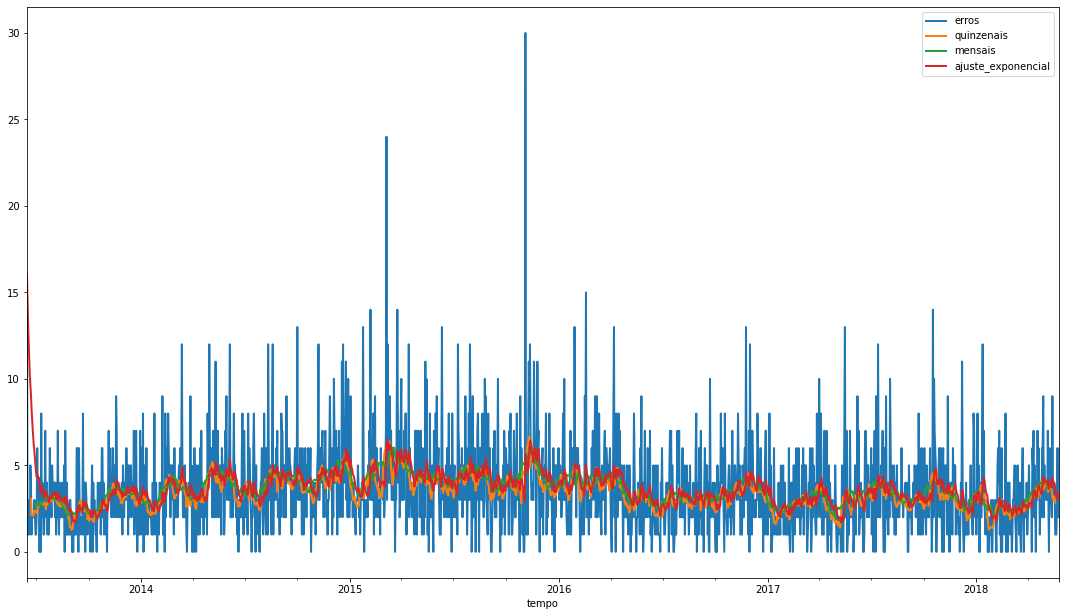

In [ ]:
falhas.drop(['anuais','semestrais','semanais'], axis=1).plot(figsize=(18.5, 10.5), linewidth=2)